In [1]:
import numpy as np
import pandas as pd
import glob
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 10)
import matplotlib.ticker as mtick

# Average dN/dS

In [2]:
# Define a function for calculating dN/dS when both dN and dS is zero. 
def weird_division(df):
    if df[5]==0 and df[6]==0:
        return 0
    elif df[5]==0:
        return 0
    elif df[6]==0:
        return np.NaN
    return df[5] / df[6]

Import ortholog information, including dN and dS, which was downloaded from Ensembl 98. 

In [3]:
df_list = []
for file in sorted(glob.glob('../results/Ensembl98_mouse/mouse_protein_coding_genes.*.txt')):
    species_code_name = (file[54:-4]) # debug: June 16, 2020
    # print(species_code_name)
    df = pd.read_csv(file, sep='\t', header=None, na_values=('ortholog_one2many', 'ortholog_many2many') ,index_col=0)
    df = pd.DataFrame(df.dropna().drop_duplicates().apply(weird_division, axis=1),columns=[species_code_name+'_dNdS'])
    df_list.append(df.dropna().drop_duplicates())

In [4]:
info_df = pd.read_csv('../data/info.mouse_protein_coding_genes.tsv',sep='\t',header=0,index_col=0)

In [5]:
info_df.drop_duplicates(subset='Gene name',inplace=True) # Drop the duplicated gene names

In [6]:
# qgrid.show_grid(info_df) # All genes are protein coding genes
integrate_df = info_df.copy(deep=True)
for df in df_list:
    integrate_df = pd.merge(integrate_df,df, left_index=True, right_index=True, how='left')
integrate_df = integrate_df.iloc[:,2:].dropna(how='all') # delete genes with no dN/dS scores
integrate_df = pd.merge(info_df,integrate_df,left_index=True,right_index=True,how='right')

In [7]:
integrate_df

,Gene name,Gene description,amelanoleuca_dNdS,anancymaae_dNdS,bbbison_dNdS,bmutus_dNdS,btaurus_dNdS,capalliatus_dNdS,caperea_dNdS,catys_dNdS,...,sscrofa_dNdS,tbelangeri_dNdS,tgelada_dNdS,ttruncatus_dNdS,uamericanus_dNdS,umaritimus_dNdS,uparryii_dNdS,vpacos_dNdS,vursinus_dNdS,vvulpes_dNdS
Gene stable ID,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000064370,mt-Cytb,mitochondrially encoded cytochrome b [Source:M...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000064368,mt-Nd6,mitochondrially encoded NADH dehydrogenase 6 [...,0.011380,NaN,0.015854,0.017438,0.022005,NaN,NaN,NaN,...,0.005290,0.019298,NaN,0.019553,NaN,0.004203,NaN,0.014597,0.044581,NaN
ENSMUSG00000064367,mt-Nd5,mitochondrially encoded NADH dehydrogenase 5 [...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032160,NaN
ENSMUSG00000065947,mt-Nd4l,mitochondrially encoded NADH dehydrogenase 4L ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000064360,mt-Nd3,mitochondrially encoded NADH dehydrogenase 3 [...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000006307,Kmt2b,lysine (K)-specific methyltransferase 2B [Sour...,0.131853,0.120417,NaN,NaN,0.136626,0.120037,0.168880,0.116898,...,0.127080,NaN,0.114732,NaN,0.121398,0.153503,0.119989,NaN,NaN,NaN
ENSMUSG00000050035,Fhl4,four and a half LIM domains 4 [Source:MGI Symb...,NaN,NaN,0.316192,NaN,NaN,NaN,NaN,0.515086,...,NaN,NaN,NaN,NaN,NaN,0.253531,NaN,NaN,NaN,NaN
ENSMUSG00000037652,Phc3,polyhomeotic 3 [Source:MGI Symbol;Acc:MGI:2181...,0.093785,0.095962,0.090720,0.091587,0.091973,0.084127,0.148953,0.080834,...,0.093137,NaN,0.086452,NaN,0.085675,0.086921,0.086587,0.094641,0.101390,0.086610


Get the statistics for each gene across the species. 

In [15]:
# Debug June 17, 2020: include gene name column in stats_df
stats_df = pd.merge(integrate_df.iloc[:,:1],integrate_df.iloc[:,2:].apply(pd.DataFrame.describe, axis=1),left_index=True, right_index=True, how='left')

In [16]:
stats_df

,Gene name,count,mean,std,min,25%,50%,75%,max
Gene stable ID,,,,,,,,,
ENSMUSG00000064370,mt-Cytb,1.0,0.020620,NaN,0.020620,0.020620,0.020620,0.020620,0.020620
ENSMUSG00000064368,mt-Nd6,39.0,0.016243,0.015169,0.002987,0.004620,0.014597,0.020531,0.081817
ENSMUSG00000064367,mt-Nd5,4.0,0.040241,0.020722,0.022880,0.029840,0.033916,0.044317,0.070252
ENSMUSG00000065947,mt-Nd4l,2.0,0.013863,0.013198,0.004531,0.009197,0.013863,0.018530,0.023196
ENSMUSG00000064360,mt-Nd3,1.0,0.037464,NaN,0.037464,0.037464,0.037464,0.037464,0.037464
...,...,...,...,...,...,...,...,...,...
ENSMUSG00000006307,Kmt2b,70.0,0.131660,0.020034,0.088047,0.117946,0.128773,0.141021,0.195441
ENSMUSG00000050035,Fhl4,33.0,0.510940,0.263344,0.210796,0.372197,0.478016,0.534439,1.427273
ENSMUSG00000037652,Phc3,80.0,0.092761,0.018379,0.071355,0.084387,0.087158,0.094192,0.198765


Export to csv files.

In [14]:
integrate_df.to_csv('../results/Ensembl98_mouse/mouse.92_species_dNdS.all_genes.tsv',sep='\t')

In [17]:
stats_df.to_csv('../results/Ensembl98_mouse/mouse.dNdS_stats.all_genes.tsv',sep='\t')

# Statistics

In [10]:
import heapq
import scipy.stats as stats

In [11]:
arr = stats_df['mean'].dropna().values # get each gene's mean dNdS score into an array

Calculate the confidence interval of the median dN/dS score

In [12]:
low = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[0]
high = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[1]
CI_low = heapq.nsmallest(low.astype(int),arr)[-1]
CI_high = heapq.nsmallest(high.astype(int),arr)[-1]

In [13]:
CI_low #lower bound of confidence interval 

0.12735527061240987

In [14]:
CI_high #higher bound of confidence interval

0.13149618323475998

In [15]:
arr.shape #number of protein-coding genes with at least one species with valid dN/dS against mouse

(19388,)

In [16]:
stats_df['mean'].median() # median of all mouse protein coding genes' average mammalian dN/dS

0.12940804410597107

# Plotting

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [18]:
matplotlib.rcParams['figure.dpi']= 300

In [20]:
# Creating a figure 
fig = plt.figure(figsize=(10,7.5)) # Size of a letter size paper in horizontal
fig.suptitle('Distribution of dN/dS of All Mouse Protein-coding Genes', fontsize=14)

# Setting subplot space
grid = plt.GridSpec(nrows=1,ncols=1)

# The subplot for distribution histogram 
distr_plot = fig.add_subplot(grid[:,:])

# Set up the bins for log scale x-axis, and get the centers
bins=np.logspace(np.log10(0.001),np.log10(10), 100)
bins_cntr = (bins[1:] + bins[:-1]) / 2

# Distribution Histograms
counts, bin_edges, ignored = distr_plot.hist(arr, bins, histtype='stepfilled', alpha=0.3, 
                                           label='dN/dS of protein-coding genes (med={0:.3f})'.format(np.median(arr)))
# Log-normal Curve for Late Development Genes
try:
    # calculate area of histograms (area under PDF should be 1)
    area_hist = ((bin_edges[1:] - bin_edges[:-1]) * counts).sum()
    shape, loc, scale = stats.lognorm.fit(arr)
    # pdf-values using cdf 
    fit_log_cntr_ = stats.lognorm.cdf(bins, shape, loc=loc, scale=scale)
    fit_log_cntr = np.diff(fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, fit_log_cntr * counts.sum(),'b-', 
                    label='lognormal fit of dN/dS distribution', linewidth=2)
except ValueError:
    pass

# Axis labels
distr_plot.set_xlabel(xlabel='dN/dS')
distr_plot.set_ylabel(ylabel='number of genes')
distr_plot.set_xscale('log')
distr_plot.legend(loc='best')

fig.savefig('../figures/mouse.all_genes.pdf')
fig.savefig('../figures/mouse.all_genes.eps')
fig.savefig('../figures/mouse.all_genes.png')
plt.close()

Text(0.5, 0.98, 'Distribution of dN/dS of All Mouse Protein-coding Genes')

Text(0.5, 0, 'dN/dS')

Text(0, 0.5, 'number of genes')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


# Tissue-specific genes based on MGI Gene Expression Database

In [93]:
MGI_df = pd.read_csv('/Users/xulinhe/OneDrive/Herculano_Lab/Benchmark_Genes/MGI_Gene_Expression_Database/MGI_ID-tissue_type.tsv',sep='\t',index_col=0,names=['MGI ID','Tissue'])

In [94]:
MGI_df

,Tissue
MGI ID,
MGI:1915112,brain
MGI:1913701,brain
MGI:1919667,brain
MGI:1920350,brain
MGI:1922411,brain
...,...
MGI:1330343,skin
MGI:3045213,skin
MGI:2146189,skin


In [95]:
Ensembl_df = pd.read_csv('/Users/xulinhe/OneDrive/Herculano_Lab/Benchmark_Genes/MGI_Gene_Expression_Database/Ensembl_ID-MGI_ID.tsv',sep='\t',index_col=1)

In [96]:
Ensembl_df = Ensembl_df[~Ensembl_df.index.duplicated(keep='first')] # remove duplicated Ensembl IDs for the same gene

In [97]:
Ensembl_df

,Gene stable ID
MGI ID,
MGI:101774,ENSMUSG00000003379
MGI:101920,ENSMUSG00000002957
MGI:102581,ENSMUSG00000066441
MGI:102744,ENSMUSG00000024369
MGI:102756,ENSMUSG00000036938
...,...
MGI:99456,ENSMUSG00000074037
MGI:99481,ENSMUSG00000031645
MGI:99515,ENSMUSG00000021457


In [98]:
tissue_df = pd.merge(MGI_df,Ensembl_df, left_index=True, right_index=True, how='right')

In [99]:
tissue_df = tissue_df.reset_index().set_index('Gene stable ID')

In [100]:
tissue_df = pd.merge(tissue_df,stats_df,left_index=True,right_index=True,how='left')

In [101]:
tissue_df.dropna(inplace=True)

In [104]:
tissue_df=pd.merge(info_df,tissue_df,left_index=True,right_index=True,how='right')

In [ ]:
qgrid.show_grid(tissue_df)

In [108]:
brain_df = tissue_df[tissue_df['Tissue']=='brain']
brain_arr = brain_df['mean'].dropna().values
heart_df = tissue_df[tissue_df['Tissue']=='heart']
heart_arr = heart_df['mean'].dropna().values
kidney_df = tissue_df[tissue_df['Tissue']=='kidney']
kidney_arr = kidney_df['mean'].dropna().values
liver_df = tissue_df[tissue_df['Tissue']=='liver']
liver_arr = liver_df['mean'].dropna().values
lung_df = tissue_df[tissue_df['Tissue']=='lung']
lung_arr = lung_df['mean'].dropna().values
pancreas_df = tissue_df[tissue_df['Tissue']=='pancreas']
pancreas_arr = pancreas_df['mean'].dropna().values
skin_df = tissue_df[tissue_df['Tissue']=='skin']
skin_arr = skin_df['mean'].dropna().values

Text(0.5, 0.98, 'Distribution of dN/dS of Mouse Tissue-specific Genes')

Text(0.5, 0, 'dN/dS')

Text(0, 0.5, 'percentage of genes')

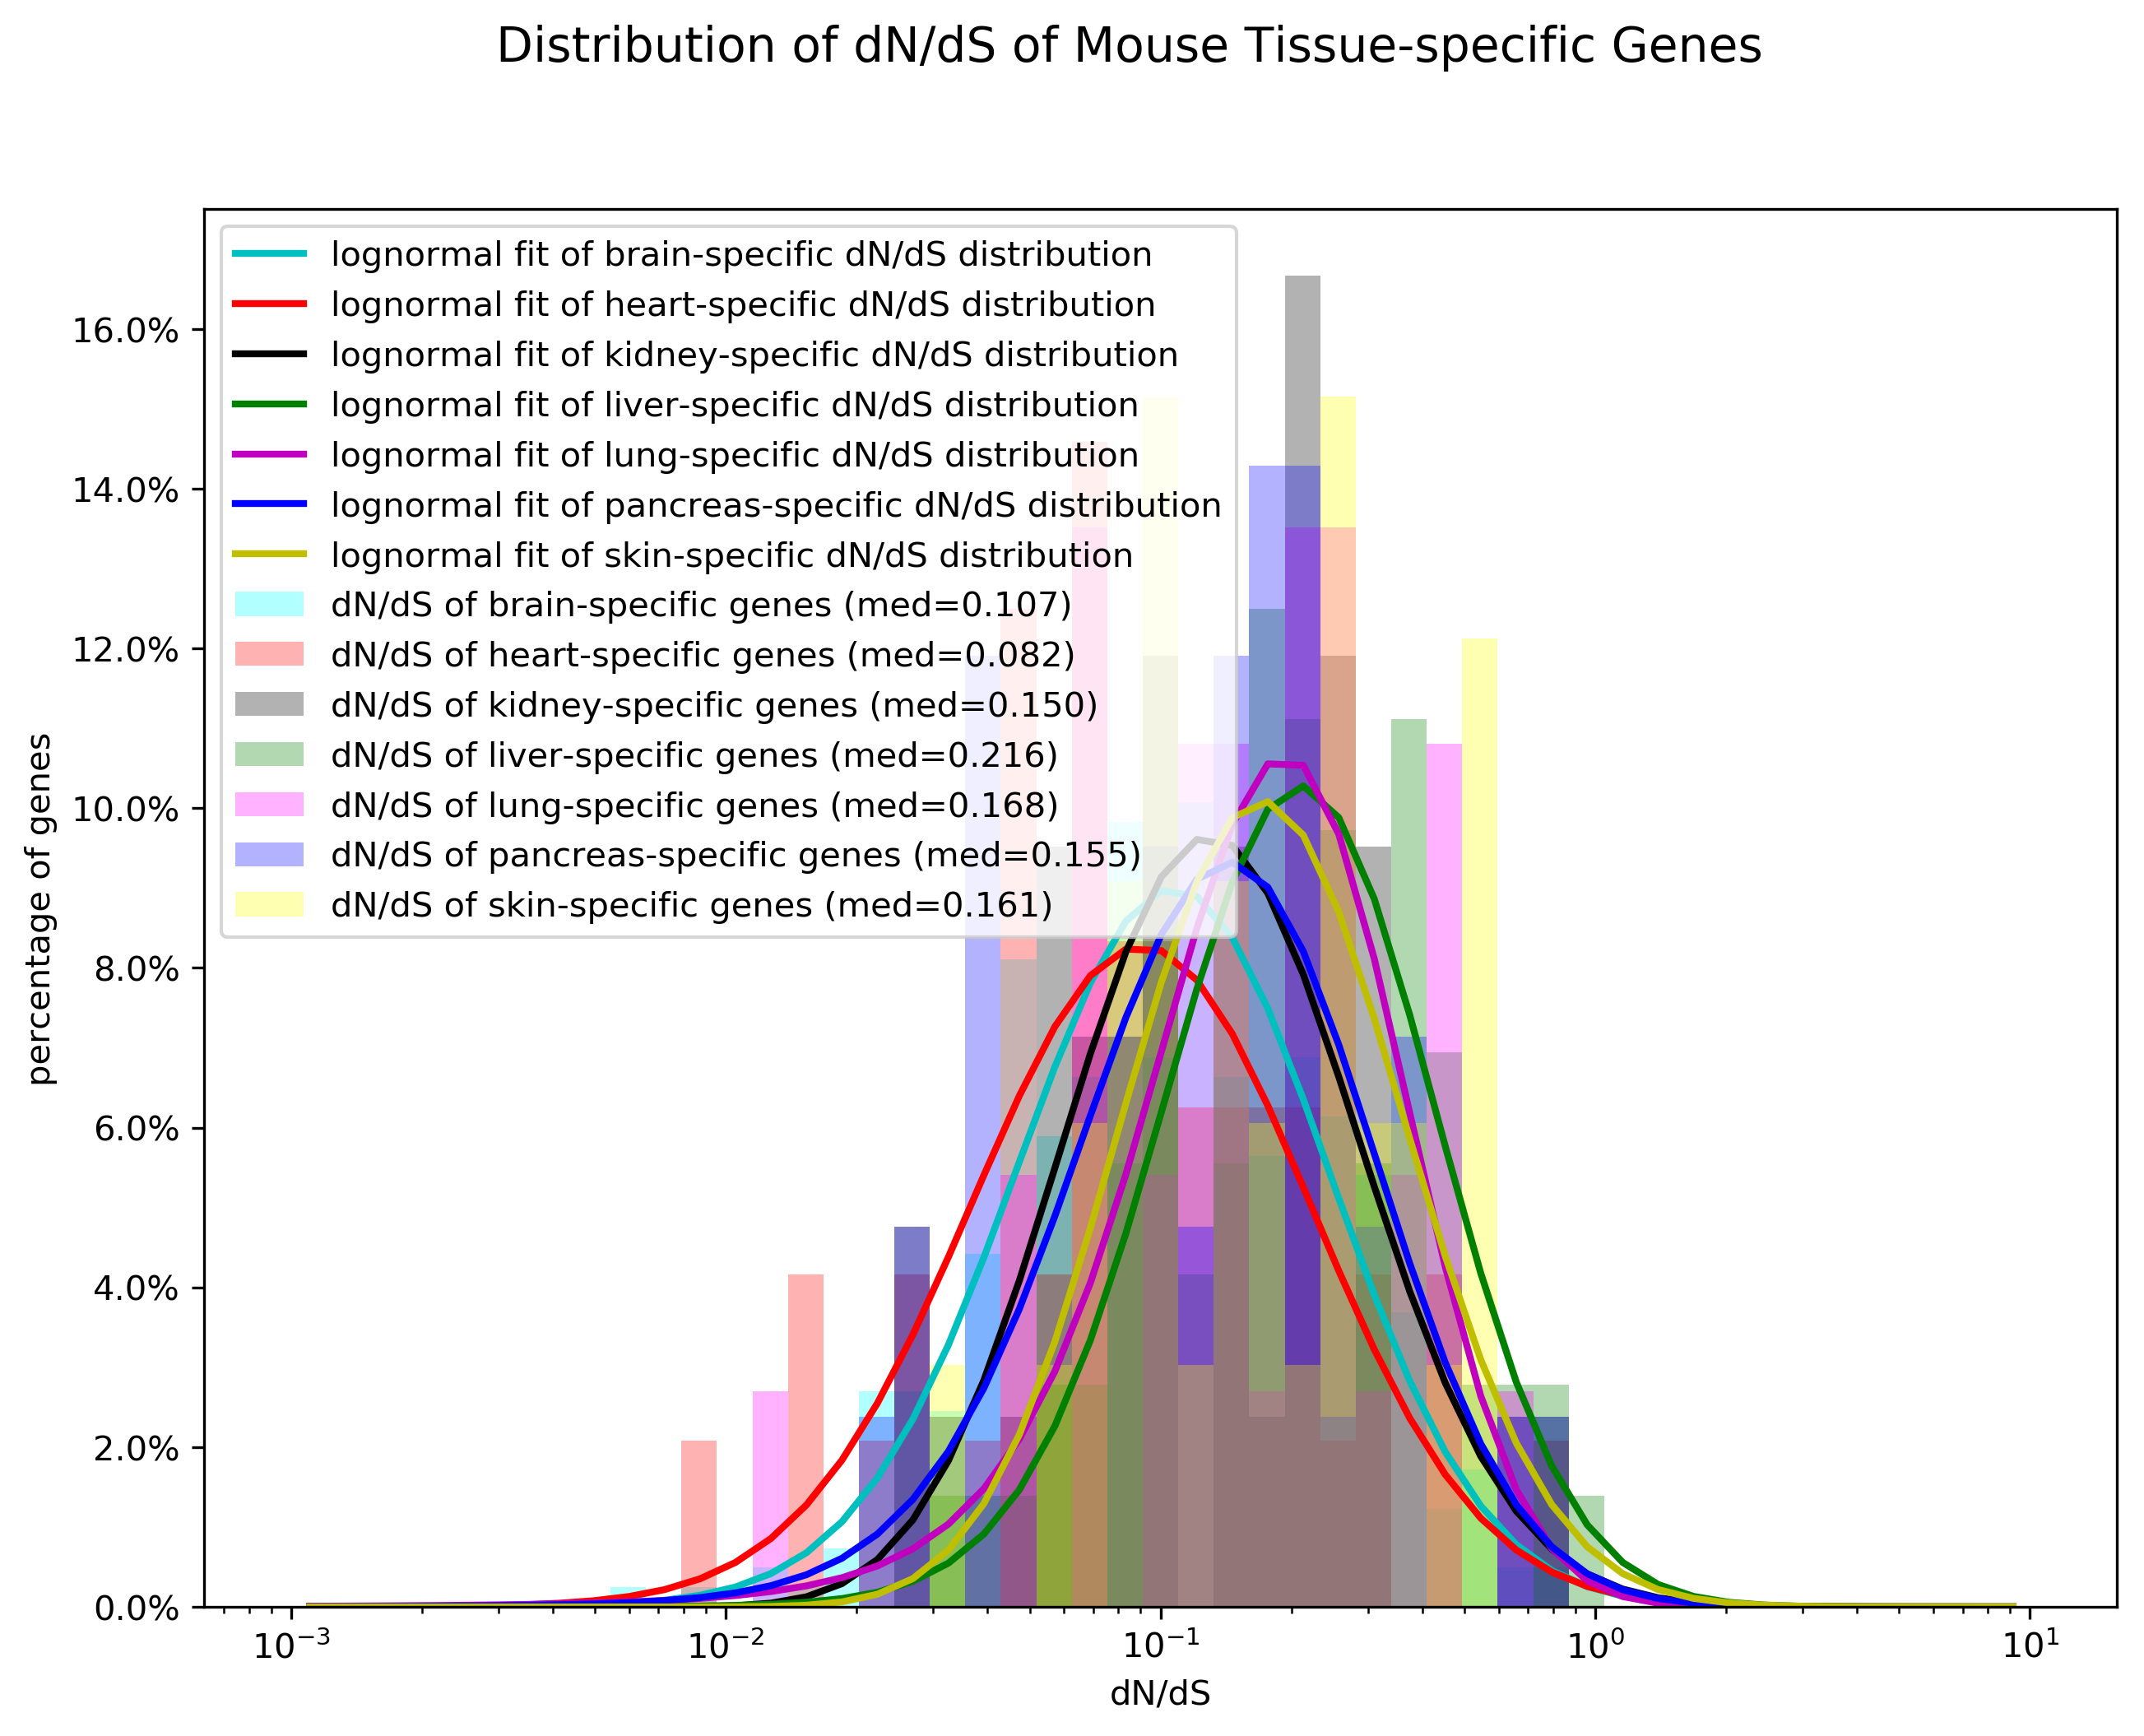

In [121]:
# Creating a figure 
fig = plt.figure(figsize=(10,7.5)) # Size of a letter size paper in horizontal
fig.suptitle('Distribution of dN/dS of Mouse Tissue-specific Genes', fontsize=14)

# Setting subplot space
grid = plt.GridSpec(nrows=1,ncols=1)
#grid.update(wspace=0.5, hspace=0.3)

# The subplot for distribution histogram 
distr_plot = fig.add_subplot(grid[:,:])
#distr_hist = dist_GO_df.plot(ax=distr_plot, kind='hist',alpha=0.3,bins=np.logspace(np.log10(0.001),np.log10(10), 100), logx=True, color=['royalblue','orange','lightgreen'])

# Set up the bins for log scale x-axis, and get the centers
bins=np.logspace(np.log10(0.001),np.log10(10), 50)
bins_cntr = (bins[1:] + bins[:-1]) / 2

# brain-specific genes' dN/dS histogram and curve
brain_counts, brain_bin_edges, ignored = distr_plot.hist(brain_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(brain_arr)) / len(brain_arr),color='cyan',label='dN/dS of brain-specific genes (med={0:.3f})'.format(np.median(brain_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    brain_area_hist = ((brain_bin_edges[1:] - brain_bin_edges[:-1]) * brain_counts).sum()
    brain_shape, brain_loc, brain_scale = stats.lognorm.fit(brain_arr)
    # pdf-values using cdf 
    brain_fit_log_cntr_ = stats.lognorm.cdf(bins, brain_shape, loc=brain_loc, scale=brain_scale)
    brain_fit_log_cntr = np.diff(brain_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, brain_fit_log_cntr * brain_counts.sum(),'c-', 
                    label='lognormal fit of brain-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# heart-specific genes' dN/dS histogram and curve
heart_counts, heart_bin_edges, ignored = distr_plot.hist(heart_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(heart_arr)) / len(heart_arr),color='red',label='dN/dS of heart-specific genes (med={0:.3f})'.format(np.median(heart_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    heart_area_hist = ((heart_bin_edges[1:] - heart_bin_edges[:-1]) * heart_counts).sum()
    heart_shape, heart_loc, heart_scale = stats.lognorm.fit(heart_arr)
    # pdf-values using cdf 
    heart_fit_log_cntr_ = stats.lognorm.cdf(bins, heart_shape, loc=heart_loc, scale=heart_scale)
    heart_fit_log_cntr = np.diff(heart_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, heart_fit_log_cntr * heart_counts.sum(),'r-', 
                    label='lognormal fit of heart-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# kidney-specific genes' dN/dS histogram and curve
kidney_counts, kidney_bin_edges, ignored = distr_plot.hist(kidney_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(kidney_arr)) / len(kidney_arr),color='black',label='dN/dS of kidney-specific genes (med={0:.3f})'.format(np.median(kidney_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    kidney_area_hist = ((kidney_bin_edges[1:] - kidney_bin_edges[:-1]) * kidney_counts).sum()
    kidney_shape, kidney_loc, kidney_scale = stats.lognorm.fit(kidney_arr)
    # pdf-values using cdf 
    kidney_fit_log_cntr_ = stats.lognorm.cdf(bins, kidney_shape, loc=kidney_loc, scale=kidney_scale)
    kidney_fit_log_cntr = np.diff(kidney_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, kidney_fit_log_cntr * kidney_counts.sum(),'k-', 
                    label='lognormal fit of kidney-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# liver-specific genes' dN/dS histogram and curve
liver_counts, liver_bin_edges, ignored = distr_plot.hist(liver_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(liver_arr)) / len(liver_arr),color='green',label='dN/dS of liver-specific genes (med={0:.3f})'.format(np.median(liver_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    liver_area_hist = ((liver_bin_edges[1:] - liver_bin_edges[:-1]) * liver_counts).sum()
    liver_shape, liver_loc, liver_scale = stats.lognorm.fit(liver_arr)
    # pdf-values using cdf 
    liver_fit_log_cntr_ = stats.lognorm.cdf(bins, liver_shape, loc=liver_loc, scale=liver_scale)
    liver_fit_log_cntr = np.diff(liver_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, liver_fit_log_cntr * liver_counts.sum(),'g-', 
                    label='lognormal fit of liver-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# lung-specific genes' dN/dS histogram and curve
lung_counts, lung_bin_edges, ignored = distr_plot.hist(lung_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(lung_arr)) / len(lung_arr),color='magenta',label='dN/dS of lung-specific genes (med={0:.3f})'.format(np.median(lung_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    lung_area_hist = ((lung_bin_edges[1:] - lung_bin_edges[:-1]) * lung_counts).sum()
    lung_shape, lung_loc, lung_scale = stats.lognorm.fit(lung_arr)
    # pdf-values using cdf 
    lung_fit_log_cntr_ = stats.lognorm.cdf(bins, lung_shape, loc=lung_loc, scale=lung_scale)
    lung_fit_log_cntr = np.diff(lung_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, lung_fit_log_cntr * lung_counts.sum(),'m-', 
                    label='lognormal fit of lung-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# pancreas-specific genes' dN/dS histogram and curve
pancreas_counts, pancreas_bin_edges, ignored = distr_plot.hist(pancreas_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(pancreas_arr)) / len(pancreas_arr),color='blue',label='dN/dS of pancreas-specific genes (med={0:.3f})'.format(np.median(pancreas_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    pancreas_area_hist = ((pancreas_bin_edges[1:] - pancreas_bin_edges[:-1]) * pancreas_counts).sum()
    pancreas_shape, pancreas_loc, pancreas_scale = stats.lognorm.fit(pancreas_arr)
    # pdf-values using cdf 
    pancreas_fit_log_cntr_ = stats.lognorm.cdf(bins, pancreas_shape, loc=pancreas_loc, scale=pancreas_scale)
    pancreas_fit_log_cntr = np.diff(pancreas_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, pancreas_fit_log_cntr * pancreas_counts.sum(),'b-', 
                    label='lognormal fit of pancreas-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# skin-specific genes' dN/dS histogram and curve
skin_counts, skin_bin_edges, ignored = distr_plot.hist(skin_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(skin_arr)) / len(skin_arr),color='yellow',label='dN/dS of skin-specific genes (med={0:.3f})'.format(np.median(skin_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    skin_area_hist = ((skin_bin_edges[1:] - skin_bin_edges[:-1]) * skin_counts).sum()
    skin_shape, skin_loc, skin_scale = stats.lognorm.fit(skin_arr)
    # pdf-values using cdf 
    skin_fit_log_cntr_ = stats.lognorm.cdf(bins, skin_shape, loc=skin_loc, scale=skin_scale)
    skin_fit_log_cntr = np.diff(skin_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, skin_fit_log_cntr * skin_counts.sum(),'y-', 
                    label='lognormal fit of skin-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# Axis labels
distr_plot.set_xlabel(xlabel='dN/dS')
distr_plot.set_ylabel(ylabel='percentage of genes')
distr_plot.set_xscale('log')
distr_plot.legend(loc='best')
distr_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1))
#fig.savefig('./April_8_2019_Data_Reports/'+'All Genes'+' contingency analysis.pdf')
plt.show()
#plt.close()